# Predicting Ad Clicks using Logistic Regression

## Objective:
- Build a Logistic Regression model to predict whether a user will click on an advertisement based on their internet usage behavior and demographics. Perform a detailed Exploratory Data Analysis (EDA) before model training.



### Feature Descriptions
- Daily Time Spent on Site (float) – The amount of time (in minutes) a user spends on the website daily.
- Age (int) – The age of the user.
- Area Income (float) – The average income of the user’s area (in USD).
- Daily Internet Usage (float) – The amount of time (in minutes) a user spends on the internet daily.
- Ad Topic Line (string) – The headline of the advertisement shown to the user.
- City (string) – The city where the user is located.
- Male (binary: 0 or 1) – Indicates the gender of the user (1 = Male, 0 = Female).
- Country (string) – The country where the user is located.
- Timestamp (datetime) – The date and time when the user interacted with the ad.
- Clicked on Ad (binary: 0 or 1) – The target variable, indicating whether the user clicked on the ad (1 = Clicked, 0 = Did not click).

## 🔹 Step 1: Load and Explore the Data

#### 📍 1.1 Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

#### 📍 1.2 Load the Dataset

In [7]:
df = pd.read_csv('advertising.csv')

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


#### 📍 1.3 Basic Data Exploration

In [9]:
# Check dataset information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       945 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      993 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [10]:
# Check for missing values:

df.isnull().sum()

Daily Time Spent on Site     0
Age                         55
Area Income                  0
Daily Internet Usage         7
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [11]:
# Handle Missing Values

from sklearn.impute import SimpleImputer

# Define columns with missing values
columns_to_impute = ['Age', 'Daily Internet Usage']

# Initialize the imputer with "mean" strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform only the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [12]:
# Check for missing values again

df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [13]:
# Check Duplicate values

df.duplicated().sum()

0

## 🔹 Step 2: Exploratory Data Analysis (EDA)

#### 📍 2.1 Statistical Summary of Numerical Features

In [16]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,35.960847,55000.000080,180.023686,0.481000,0.50000
std,15.853615,8.535714,13414.634022,43.844430,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.975000,0.000000,0.00000
50%,68.215000,35.960847,57012.300000,182.650000,0.000000,0.50000
75%,78.547500,41.000000,65470.635000,218.655000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#### 📍 2.2 Target Variable Distribution

C:\Users\suraj\AppData\Local\Temp\ipykernel_24036\4041989486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad', data=df, palette='pastel')


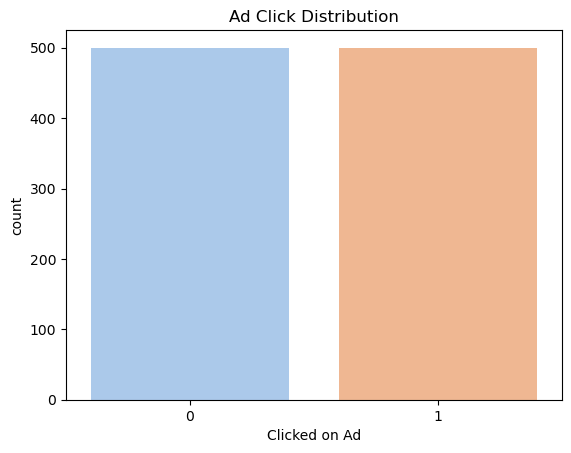

In [18]:
# Analyze the Clicked on Ad distribution to check if the data is balanced.

sns.countplot(x='Clicked on Ad', data=df, palette='pastel')
plt.title('Ad Click Distribution')
plt.show()


#### 📍 2.3 Distribution of Numerical Features

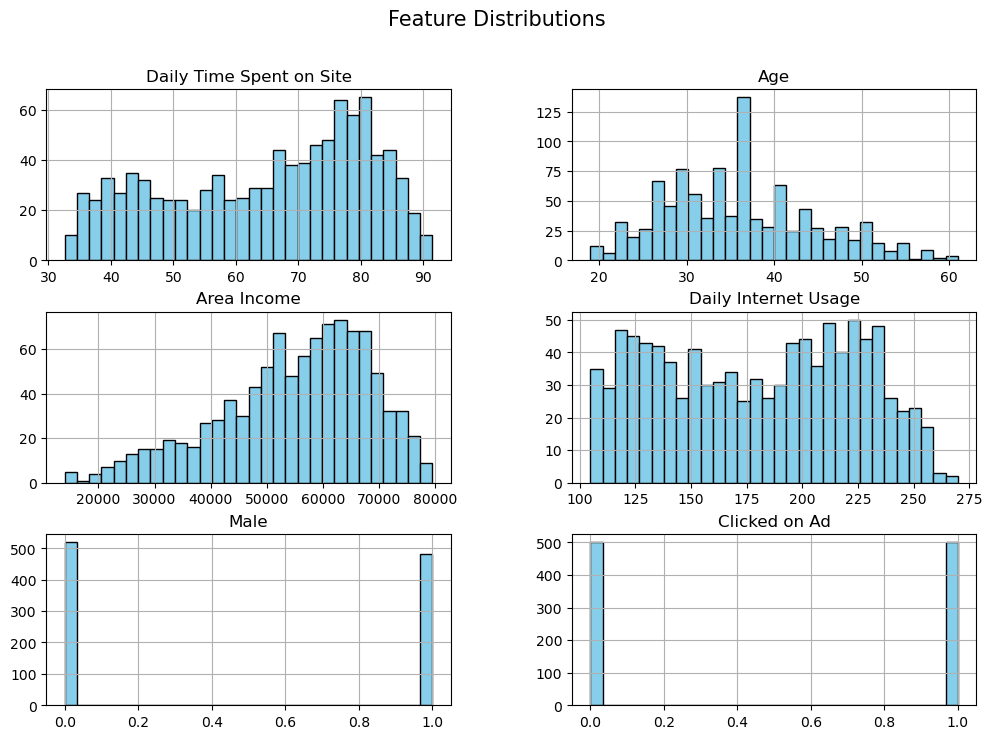

In [20]:
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=15)
plt.show()

#### Inferenece:

- Daily Time Spent on Site' follows a roughly normal distribution.

- 'Area Income' has a wide spread, indicating variation in user earnings.

- 'Daily Internet Usage' shows a consistent pattern, with most users spending significant time online.

- 'Age' exhibits a somewhat skewed distribution, highlighting potential targeting opportunities for advertisements.

####  2.4 Pairplot to Understand Relationships

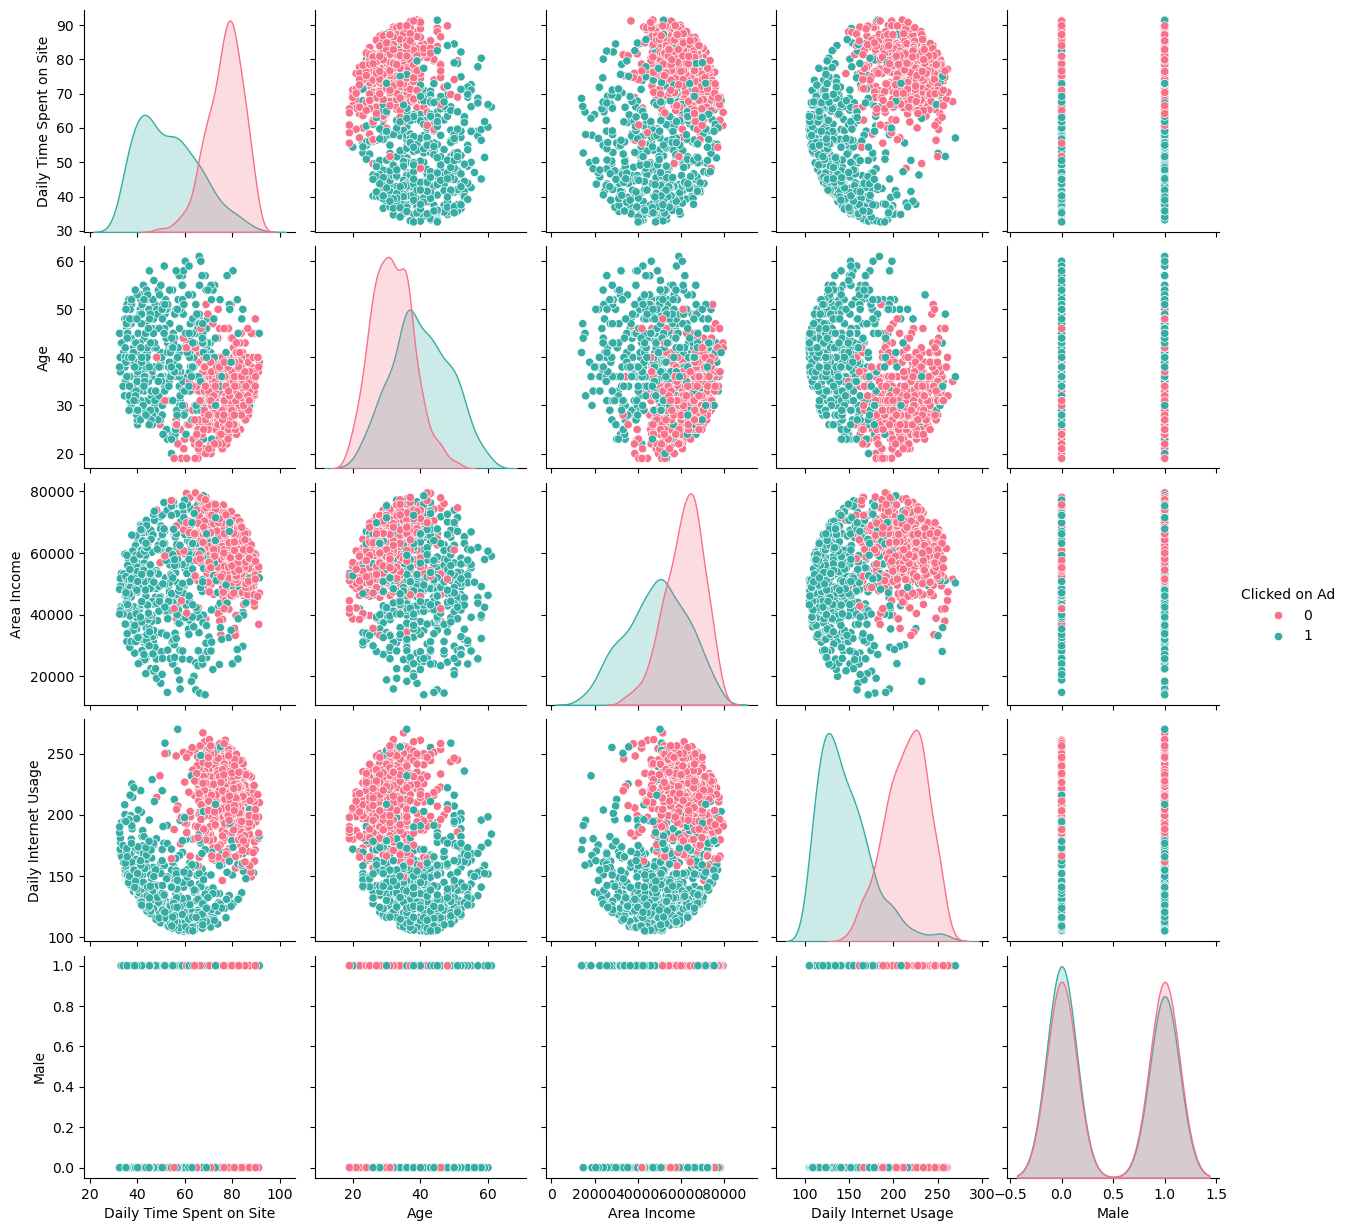

In [23]:
sns.pairplot(df, hue='Clicked on Ad', palette='husl')
plt.show()

#### Conclusion:

- Users with higher 'Daily Time Spent on Site' seem less likely to click on ads.

- The pairplot indicates that the separation between those who clicked and those who didn't is more distinct for 'Age' than for other variables.

- Male and Female users appear to have similar ad-clicking patterns.

#### 📍 2.5 Correlation Heatmap

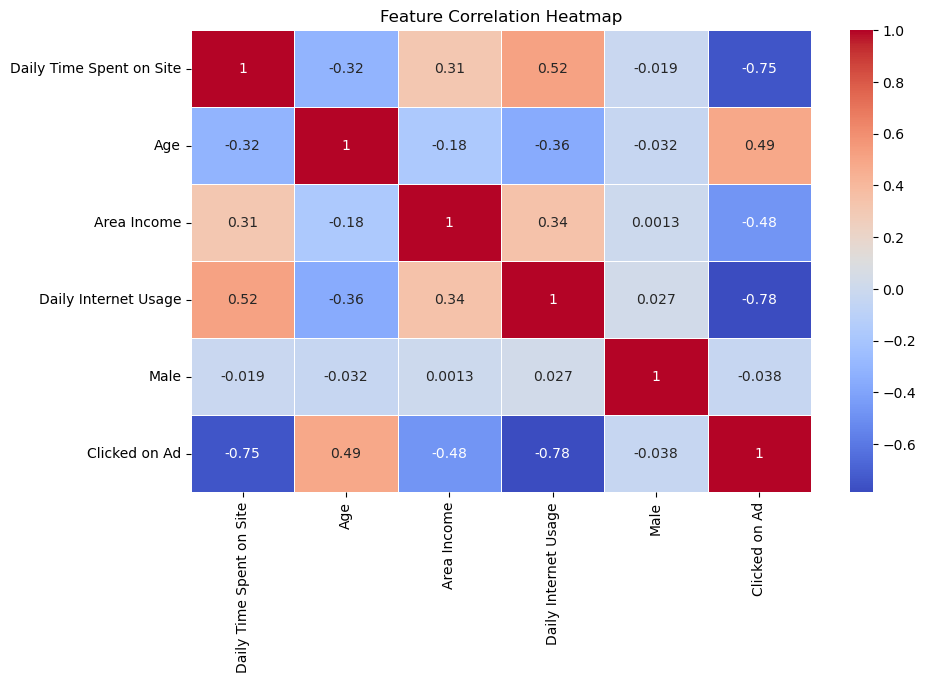

In [26]:
plt.figure(figsize=(10, 6))

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Conclusion:

- 'Daily Time Spent on Site' is negatively correlated with 'Clicked on Ad', implying users spending more time on the site are less likely to click ads.

- 'Daily Internet Usage' has a weak correlation with ad clicks, suggesting other factors influence ad engagement.

- 'Area Income' and 'Age' have minimal correlation with the target variable, indicating limited predictive power.

#### 📍 2.6 Boxplots to Detect Outliers

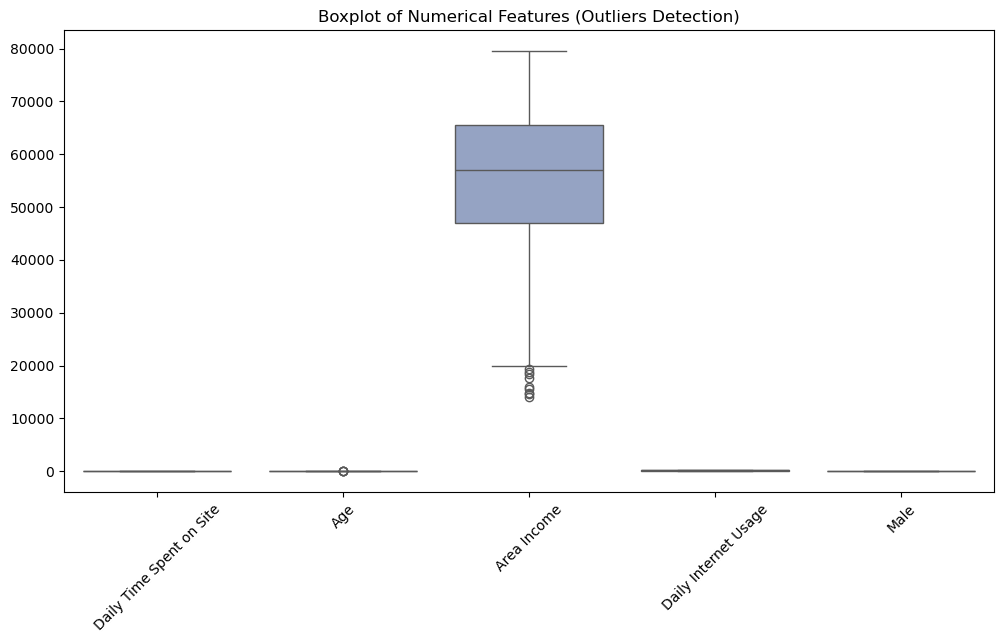

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['Clicked on Ad']), palette='Set2')
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()

- Some outliers were identified in 'Age' and 'Area Income', suggesting extreme values that may need further handling.

- 'Daily Time Spent on Site' and 'Daily Internet Usage' appear to have a more compact distribution with fewer outliers.

#### 📍 2.7 Feature Relationships with Target Variable

C:\Users\suraj\AppData\Local\Temp\ipykernel_24036\1769773207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette='coolwarm')


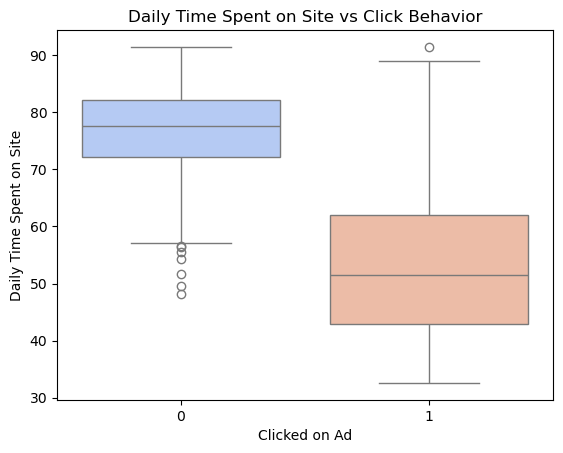

In [32]:
# Daily Time Spent on Site vs Click Behavior

sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette='coolwarm')
plt.title("Daily Time Spent on Site vs Click Behavior")
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_24036\3922066810.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Age', data=df, palette='Set2')


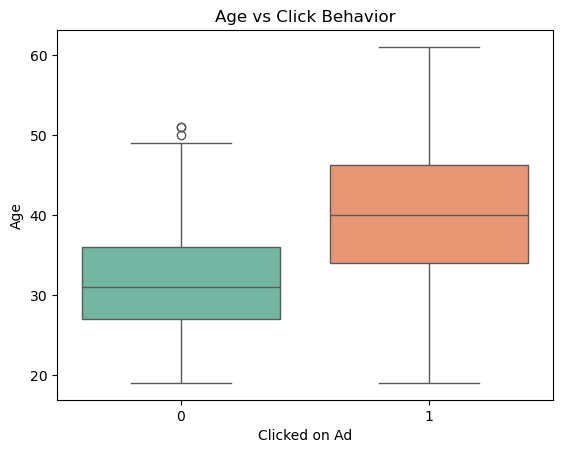

In [33]:
# Age vs Click Behavior

sns.boxplot(x='Clicked on Ad', y='Age', data=df, palette='Set2')
plt.title("Age vs Click Behavior")
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_24036\2329458364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, palette='Set1')


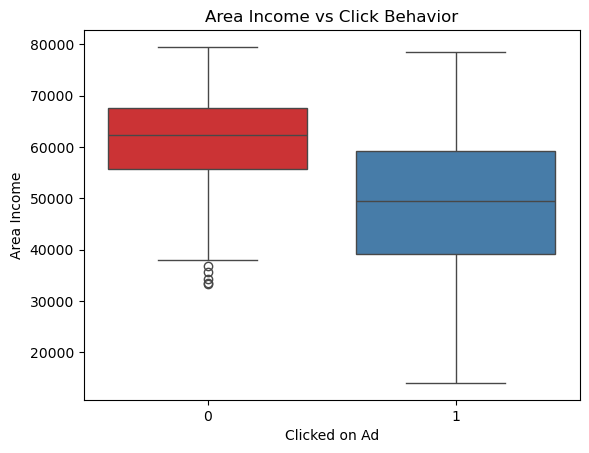

In [34]:
# Area Income vs Click Behavior

sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, palette='Set1')
plt.title("Area Income vs Click Behavior")
plt.show()


## 🔹 Step 3: Data Preprocessing

#### 1. Drop irrelevant columns

- Since Ad Topic Line, City, and Country are categorical and not useful in prediction, drop them:

In [37]:
df = df.drop(columns=['Ad Topic Line', 'City', 'Country'])

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,0,27-03-2016 00:53,0
1,80.23,31.0,68441.85,193.77,1,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,0,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,1,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,0,03-06-2016 03:36,0


#### 2. Convert Timestamp to DateTime & Extract Features


In [39]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour  # Extract Hour
df['Day'] = df['Timestamp'].dt.day    # Extract Day
df = df.drop(columns=['Timestamp'])   # Drop original column

C:\Users\suraj\AppData\Local\Temp\ipykernel_24036\1056926210.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


#### 3. Feature Scaling

In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Clicked on Ad']))

#### 4. Dividing in Features (X) & Target (y)

In [43]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Clicked on Ad']

#### 5. Split Data into Train and Test Sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔹 Step 4: Train the Logistic Regression Model

In [47]:
# Define the model

model = LogisticRegression()

In [48]:
# Train the model

model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Prediction on testing data

y_pred = model.predict(X_test)

## 🔹 Step 5: Model Evaluation

#### 1. Accuracy Score

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.955


#### 2. Classification Report

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        89
           1       0.97      0.95      0.96       111

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



#### Conclusion:

- The model was trained on the dataset and performed well in distinguishing between users who clicked ads and those who didn't.

- Coefficients suggest that 'Daily Time Spent on Site' and 'Age' significantly impact ad click behavior.

#### 3. Confusion Matrix

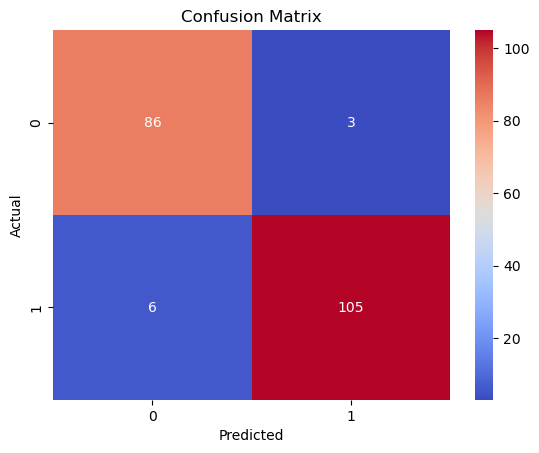

In [57]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#### Conclusion:

- The model correctly classified a majority of instances but made some false predictions.

- Precision and recall scores indicate a balanced performance, though further tuning may enhance accuracy.

#### 4. ROC Curve & AUC Score


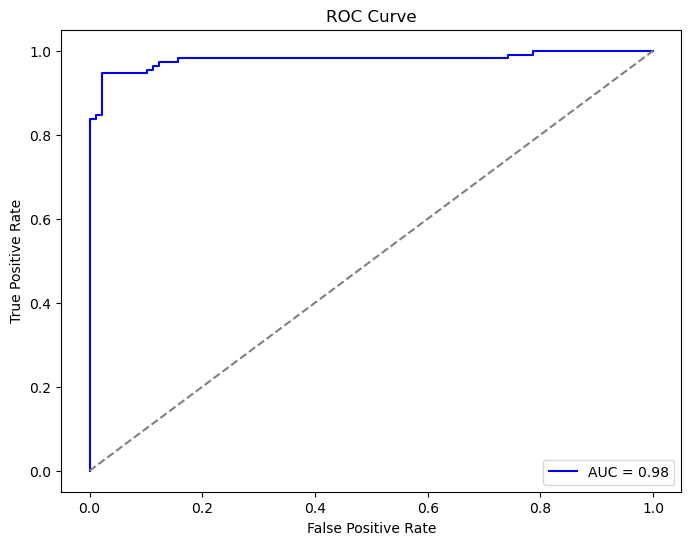

In [60]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Final Conclusion:

- The dataset contains valuable insights into user behavior related to ad clicks.

- Logistic Regression proves to be a reasonable choice for classification, with potential improvements using feature engineering or alternative models.

- Further refinement, such as feature selection and hyperparameter tuning, may improve predictive power.


In [101]:
import joblib

joblib.dump(model, "pred_ad_click.pkl")

['pred_ad_click.pkl']